# Information Retrieval and Text Analytics Project

## Introduction

**Overview of Information Retrieval (IR) Systems:** An information retrieval system is a system or software designed to search for and retrieve relevant information from a large collection of unstructured or semi-structured data, such as text documents, images, or multimedia content, based on user queries. These systems are essential in handling vast amounts of information, such as those found on the internet, in digital libraries, or within enterprise data systems.

Examples of information retrieval systems:
1.   **Google:** A search engine that retrieves relevant web pages based on keywords entered by the user.
2.   **Amazon:** An e-commerce platform where users search for products by entering keywords or browsing categories.
3.   **PubMed:** A database for medical research articles, allowing users to search for academic papers related to health and science.



**Background:** Data can be found everywhere around us. With the proliferation of digital devices, vast amounts of data are being generated and shared. We can find valuable information in news, books, papers, documentations and wikis. Though to find this valuable information, one must swim through a sea of redundant and sometimes useless data. Therefore, there is a growing need for a way to quickly obtain and sift through this data to extract valuable insights. Many information retrieval models were developed to handle said issue, albeit with varying performances. This creates the issue where we want to know which model performs better in the realm of information retrieval.



**Objective:** This project aims to develop a system that retrieves relevant information from text datasets using 3 different information retrieval models and comparing between their performances to know which one is better. The system also allows us to improve the understanding and organization of the data through text analytics. This includes leveraging preprocessing techniques to enhance text representation, applying robust retrieval methods to ensure accuracy, and utilizing visualizations to provide actionable insights and evaluate performance effectively.

**Scope:** The scope includes implementing advanced preprocessing techniques such as tokenization, case standardization, stopwords removal, stemming, and TF-IDF to improve text representation. Additionally, it encompasses the integration of Vector Space Model, Boolean Retrieval Model, and BM25 retrieval algorithms for ranking and identifying relevant information based on user queries. We compare between the performances of these algorithms. To enhance usability, the project will also incorporate visualization tools such as word clouds for top keywords in documents, Frequency distribution of words, document-query similarity scores (e.g., bar charts), and clustering topics using LDA (Latent Dirichlet Allocation). The project will be limited to textual data and will not cover multimedia or non-textual information retrieval.

## Data Collection

In [2]:
# Downloading required dataset(s)
# !pip install kagglehub
# !pip install rank_bm25
# !pip install nltk
# !pip install scikit-learn
# !pip install wordcloud
# !pip install pyLDAvis
# !pip install pyLDAvis.sklearn
import kagglehub
import nltk
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# nltk.download('punkt_tab')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# path = kagglehub.dataset_download("crawford/20-newsgroups")
# The dataset will be download in /home/<user>/.cache/kagglehub


## Data Inspection

In [3]:
# Specify the file path
file_path = "./20-newsgroups/talk.politics.guns.txt"  # Replace with the actual path to your file

# Check if the file exists
if os.path.exists(file_path):
    # Open the file and read its contents
    with open(file_path, 'r', encoding='latin-1') as file:  # Use 'latin-1' encoding
        file_contents = file.read()

    # Print or process the file contents
    print(file_contents[:200])  # Print the first 200 characters of the file contents
else:
    print(f"Error: File not found at '{file_path}'")

Newsgroup: talk.politics.guns
document_id: 53293
From: manes@magpie.linknet.com (Steve Manes)
Subject: Re: Gun Control (was Re: We're Mad as Hell at the TV News)

hambidge@bms.com wrote:
: In article 


# Data Preprocessing

#### Tokenization, lowercasing, stopwords removal, stemming and lemmatization.

In [4]:
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

#### Vectorization (BoW/TF-IDF)

In [5]:
def vectorize_texts(texts, method='bow'):
    """
    Vectorize texts using Bag of Words (BOW) or TF-IDF.

    Parameters:
    texts (list of str): List of texts to vectorize.
    method (str): Method of vectorization ('bow' or 'tfidf').

    Returns:
    X (sparse matrix): Vectorized text data.
    vectorizer (Vectorizer object): Fitted vectorizer.
    """
    if method == 'bow':
        vectorizer = CountVectorizer()
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Method must be 'bow' or 'tfidf'")

    X = vectorizer.fit_transform(texts)
    return X, vectorizer

##### Read and Process all the documents

In [6]:
def read_and_preprocess_files(directory_path='./20-newsgroups'):
    preprocessed_texts = []
    filenames = []
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='latin-1') as file:
                text = file.read()
                preprocessed_text = preprocess_text(text)
                preprocessed_texts.append(preprocessed_text)
                filenames.append(filename)
    return preprocessed_texts, filenames

In [7]:
preprocessed_texts, filenames = read_and_preprocess_files()
preprocessed_texts[:][0][:50]

'newsgroup 70337 kedz john kedziora subject motorcy'

#### BoW Vectorization

In [8]:
X_bow, vectorizer_bow = vectorize_texts(preprocessed_texts, method='bow')
print(X_bow)

  (0, 80899)	2008
  (0, 24626)	2
  (0, 67756)	4
  (0, 66248)	146
  (0, 67757)	2
  (0, 100478)	2010
  (0, 78239)	6
  (0, 110220)	512
  (0, 96151)	12
  (0, 47942)	26
  (0, 80446)	10
  (0, 83714)	62
  (0, 111789)	8
  (0, 87420)	10
  (0, 63898)	36
  (0, 68016)	24
  (0, 71828)	354
  (0, 63526)	8
  (0, 81833)	20
  (0, 52975)	10
  (0, 30746)	38
  (0, 73892)	2
  (0, 96066)	26
  (0, 14632)	42
  (0, 90798)	26
  :	:
  (19, 26405)	2
  (19, 4443)	2
  (19, 21016)	2
  (19, 96915)	2
  (19, 26406)	2
  (19, 55213)	4
  (19, 37905)	6
  (19, 36321)	2
  (19, 39290)	2
  (19, 100389)	2
  (19, 26407)	2
  (19, 76216)	2
  (19, 56678)	2
  (19, 91848)	2
  (19, 26408)	2
  (19, 71906)	2
  (19, 83018)	2
  (19, 35689)	2
  (19, 95763)	4
  (19, 64454)	2
  (19, 26409)	2
  (19, 26412)	2
  (19, 12429)	2
  (19, 44192)	4
  (19, 83315)	2


#### TF-IDF Vectorization

In [9]:
X_tfidf, vectorizer_tfidf = vectorize_texts(preprocessed_texts, method='tfidf')
print(X_tfidf)

  (0, 80899)	0.3183486610250948
  (0, 24626)	0.0010626552048910616
  (0, 67756)	0.002125310409782123
  (0, 66248)	0.023146864795649324
  (0, 67757)	0.0010626552048910616
  (0, 100478)	0.3186657413647612
  (0, 78239)	0.0018692655539685342
  (0, 110220)	0.08117256695460584
  (0, 96151)	0.001995304448961921
  (0, 47942)	0.004122044415663578
  (0, 80446)	0.0019204114943051616
  (0, 83714)	0.009829490529659302
  (0, 111789)	0.002342967332146569
  (0, 87420)	0.0024726175189384463
  (0, 63898)	0.005707446113995723
  (0, 68016)	0.0041857780404080175
  (0, 71828)	0.056123220120957946
  (0, 63526)	0.0016950762829704255
  (0, 81833)	0.0031708033966642906
  (0, 52975)	0.0017440741835033405
  (0, 30746)	0.006024526453662153
  (0, 73892)	0.0010626552048910616
  (0, 96066)	0.004122044415663578
  (0, 14632)	0.006983565571366723
  (0, 90798)	0.004122044415663578
  :	:
  (19, 26405)	0.00029588300117450454
  (19, 4443)	0.00029588300117450454
  (19, 21016)	0.00029588300117450454
  (19, 96915)	0.0002958830

# Retrieval Models

#### Set the query

In [10]:
query = "god will forgive you"
query2 = "gun control"
query3 = "PC will eventually take over the world"
querys = [query, query2, query3]

## Implementing BM25 (Best Matching 25)

In [11]:
def apply_bm25(query=query, preprocessed_texts=preprocessed_texts, filenames=filenames):
    """
    Apply BM25 algorithm to retrieve and rank documents based on a query.
    Parameters:
    query (str): The search query.
    preprocessed_texts (list of str): List of preprocessed texts.
    filenames (list of str): List of filenames corresponding to the texts.
    Returns:
    list: List of retrieved document filenames.
    dict: Dictionary of filenames and their BM25 scores.
    """
    # Tokenize the preprocessed texts
    tokenized_texts = [text.split() for text in preprocessed_texts]

    # Initialize BM25 with the tokenized corpus
    bm25 = BM25Okapi(tokenized_texts)

    # Preprocess and tokenize the query
    tokenized_query = preprocess_text(query).split()

    # Get BM25 scores for the query
    scores = bm25.get_scores(tokenized_query)

    # Rank documents based on the scores
    top_n = 5
    top_n_indices = scores.argsort()[-top_n:][::-1]

    # Retrieve the filenames of the top-ranked documents
    retrieved_docs = [filenames[i] for i in top_n_indices]

    # Create a dictionary of filenames and their scores
    ranked_documents = {filenames[i]: scores[i] for i in top_n_indices}

    return retrieved_docs, ranked_documents

In [12]:
bm25_retrieved_docs, bm25_ranked_documents = apply_bm25(query=query)

In [13]:
bm25_ranked_documents

{'soc.religion.christian.txt': 2.6655931911753097,
 'talk.religion.misc.txt': 2.6343737966394434,
 'alt.atheism.txt': 2.6237001368235138,
 'comp.graphics.txt': 2.5451193755924177,
 'talk.politics.mideast.txt': 2.515392053366641}

## Implementing Vector Space Model (VSM)

In [14]:
def apply_vsm(query=query, preprocessed_texts=preprocessed_texts, vectorizer=vectorizer_bow):
    # Vectorize the preprocessed texts
    X = vectorizer.fit_transform(preprocessed_texts)

    # Vectorize the query
    query_vector = vectorizer.transform([query])

    # Calculate cosine similarity between the query and the documents
    similarities = cosine_similarity(query_vector, X).flatten()

    # Rank documents based on similarity scores
    ranked_indices = similarities.argsort()[::-1]
    ranked_indices = ranked_indices[:5]

    # Print the ranked documents with filenames and similarity scores
    dict = {}
    for i in ranked_indices[:]:  # Display top 20 results
        dict[filenames[i]] = similarities[i]
        # print(f"Document: {filenames[i]}, Similarity: {similarities[i]}")

    retrieved_documents = [filenames[i] for i in ranked_indices]
    return retrieved_documents, dict

In [15]:
vsm_bow_retrieved_documents, vsm_bow_ranked_documents = apply_vsm(vectorizer=vectorizer_bow)

In [16]:
vsm_bow_ranked_documents 

{'soc.religion.christian.txt': 0.2164084497148714,
 'talk.religion.misc.txt': 0.166624354258407,
 'alt.atheism.txt': 0.14138208900063975,
 'misc.forsale.txt': 0.014026509344498016,
 'talk.politics.misc.txt': 0.01381811854049325}

In [17]:
vsm_tfidf_retrieved_documents, vsm_tfidf_ranked_documents = apply_vsm(vectorizer=vectorizer_tfidf)

In [18]:
vsm_tfidf_ranked_documents

{'soc.religion.christian.txt': 0.09391988693223483,
 'talk.religion.misc.txt': 0.07166104311238498,
 'alt.atheism.txt': 0.05953797813910114,
 'misc.forsale.txt': 0.006101818249681295,
 'talk.politics.misc.txt': 0.005923986737579174}

# Evaluation

#### Decide the relevant documents

In [19]:
def get_documents_names(directory_path='./20-newsgroups'):
    # Create a dictionary of filenames with keys from 1 to 20
    filenames_dict = {i+1: filename for i, filename in enumerate(os.listdir(directory_path)[:20])}

    # Print the dictionary for user reference
    for key, value in filenames_dict.items():
        print(f"{key}: {value}")

    return filenames_dict

filenames_dict = get_documents_names()

1: misc.forsale.txt
2: alt.atheism.txt
3: rec.motorcycles.txt
4: comp.windows.x.txt
5: soc.religion.christian.txt
6: comp.graphics.txt
7: sci.crypt.txt
8: talk.politics.guns.txt
9: comp.sys.ibm.pc.hardware.txt
10: sci.space.txt
11: rec.sport.baseball.txt
12: talk.religion.misc.txt
13: sci.electronics.txt
14: comp.sys.mac.hardware.txt
15: rec.autos.txt
16: comp.os.ms-windows.misc.txt
17: sci.med.txt
18: talk.politics.misc.txt
19: rec.sport.hockey.txt
20: talk.politics.mideast.txt


In [20]:
def get_relevant_documents(filenames_dict):
    # Get user input for relevant document numbers
    relevant_numbers = input("Enter the numbers related to the relevant documents, separated by commas: ")
    relevant_numbers = [int(num.strip()) for num in relevant_numbers.split(',')]

    # Save the corresponding filenames in a list
    relevant_docs = [filenames_dict[num] for num in relevant_numbers if num in filenames_dict]

    return relevant_docs

# Example usage
relevant_docs = get_relevant_documents(filenames_dict)
print(f"Relevant documents: {relevant_docs}")

Relevant documents: ['soc.religion.christian.txt', 'alt.atheism.txt', 'talk.religion.misc.txt']


### Precesion

In [21]:
def calculate_precision(retrieved_docs, relevant_docs):
    """
    Calculate precision.
    {key: value, key: value}
    Parameters:
    retrieved_docs (list): List of retrieved document filenames.
    relevant_docs (list): List of relevant document filenames.

    Returns:
    float: Precision value.
    """
    # Convert lists to sets for easier calculation
    retrieved_set = set(retrieved_docs)
    relevant_set = set(relevant_docs)

    # Calculate the number of relevant documents retrieved
    relevant_retrieved = retrieved_set.intersection(relevant_set)

    # Calculate precision
    precision = len(relevant_retrieved) / len(retrieved_set) if retrieved_set else 0

    return precision

In [22]:
# Calculate precision for BM25
bm25_precision = calculate_precision(bm25_retrieved_docs, relevant_docs)
# Calculate precision for VSM with BoW
vsm_bow_precision = calculate_precision(vsm_bow_retrieved_documents, relevant_docs)
# Calculate precision for VSM with TF-IDF
vsm_tfidf_precision = calculate_precision(vsm_tfidf_retrieved_documents, relevant_docs)

print(f"BM25 Precision: {bm25_precision}")
print(f"VSM with BoW Precision: {vsm_bow_precision}")
print(f"VSM with TF-IDF Precision: {vsm_tfidf_precision}")

BM25 Precision: 0.6
VSM with BoW Precision: 0.6
VSM with TF-IDF Precision: 0.6


### Recall

In [23]:
def calculate_recall(retrieved_docs, relevant_docs):
    """
    Calculate recall.

    Parameters:
    retrieved_docs (list): List of retrieved document filenames.
    relevant_docs (list): List of relevant document filenames.

    Returns:
    float: Recall value.
    """
    # Convert lists to sets for easier calculation
    retrieved_set = set(retrieved_docs)
    relevant_set = set(relevant_docs)

    # Calculate the number of relevant documents retrieved
    relevant_retrieved = retrieved_set.intersection(relevant_set)

    # Calculate recall
    recall = len(relevant_retrieved) / len(relevant_set) if relevant_set else 0

    return recall

In [24]:
# Calculate recall for BM25
bm25_recall = calculate_recall(bm25_retrieved_docs, relevant_docs)
# Calculate recall for VSM with BoW
vsm_bow_recall = calculate_recall(vsm_bow_retrieved_documents, relevant_docs)
# Calculate recall for VSM with TF-IDF
vsm_tfidf_recall = calculate_recall(vsm_tfidf_retrieved_documents, relevant_docs)

print(f"BM25 Recall: {bm25_recall}")
print(f"VSM with BoW Recall: {vsm_bow_recall}")
print(f"VSM with TF-IDF Recall: {vsm_tfidf_recall}")

BM25 Recall: 1.0
VSM with BoW Recall: 1.0
VSM with TF-IDF Recall: 1.0


### Mean Average Precision (MAP)

In [25]:
def calculate_mean_average_precision(retrieved_docs_list, relevant_docs_list):
    """
    Calculate Mean Average Precision (MAP).

    Parameters:
    retrieved_docs_list (list of lists): List of retrieved document filenames for each query.
    relevant_docs_list (list of lists): List of relevant document filenames for each query.

    Returns:
    float: Mean Average Precision value.
    """
    def calculate_average_precision(retrieved_docs, relevant_docs):
        """
        Calculate the average precision for a single query.


        Parameters:
        retrieved_docs (list): List of retrieved document filenames.
        relevant_docs (list): List of relevant document filenames.

        Returns:
        float: Average precision value.
        """
        retrieved_set = set(retrieved_docs)
        relevant_set = set(relevant_docs)
        
        if not relevant_set:
            return 0.0

        relevant_retrieved = 0
        precision_sum = 0.0

        for i, doc in enumerate(retrieved_set):
            if doc in relevant_set:
                relevant_retrieved += 1
                precision_sum += relevant_retrieved / (i + 1)

        return precision_sum / len(relevant_set)

    average_precisions = [
        calculate_average_precision(retrieved_docs, relevant_docs)
        for retrieved_docs, relevant_docs in zip(retrieved_docs_list, relevant_docs_list)
    ]

    return sum(average_precisions) / len(average_precisions) if average_precisions else 0.0

#### Calculate Mean Average Precision

In [27]:
"""
query = "god will forgive you"
query2 = "gun control"
query3 = "PC will eventually take over the world"

1: misc.forsale.txt
2: alt.atheism.txt
3: rec.motorcycles.txt
4: comp.windows.x.txt
5: soc.religion.christian.txt
6: comp.graphics.txt
7: sci.crypt.txt
8: talk.politics.guns.txt
9: comp.sys.ibm.pc.hardware.txt
10: sci.space.txt
11: rec.sport.baseball.txt
12: talk.religion.misc.txt
13: sci.electronics.txt
14: comp.sys.mac.hardware.txt
15: rec.autos.txt
16: comp.os.ms-windows.misc.txt
17: sci.med.txt
18: talk.politics.misc.txt
19: rec.sport.hockey.txt
20: talk.politics.mideast.txt
"""
# Calculate Mean Average Precision (MAP) for BM25, VSM with BoW, and VSM with TF-IDF
query_relevant_docs = ["alt.atheism.txt", "soc.religion.christian.txt", "talk.religion.misc.txt"]
query2_relevant_docs = ["talk.politics.guns.txt", "talk.politics.misc.txt", "talk.politics.mideast.txt"]
query3_relevant_docs = ["comp.sys.ibm.pc.hardware.txt", "comp.sys.mac.hardware.txt", "comp.os.ms-windows.misc.txt"]
relevant_docs_list = [query_relevant_docs, query2_relevant_docs, query3_relevant_docs]

bm25_retrieved_docs_list = []
vsm_bow_retrieved_docs_list = []
vsm_tfidf_retrieved_docs_list = []

for query in querys:
    bm25_retrieved_docs, _ = apply_bm25(query=query)
    vsm_bow_retrieved_docs, _ = apply_vsm(query=query, vectorizer=vectorizer_bow)
    vsm_tfidf_retrieved_docs, _ = apply_vsm(query=query, vectorizer=vectorizer_tfidf)
    
    bm25_retrieved_docs_list.append(bm25_retrieved_docs)
    vsm_bow_retrieved_docs_list.append(vsm_bow_retrieved_docs)
    vsm_tfidf_retrieved_docs_list.append(vsm_tfidf_retrieved_docs)

bm25_map = calculate_mean_average_precision(bm25_retrieved_docs_list, relevant_docs_list)
vsm_bow_map = calculate_mean_average_precision(vsm_bow_retrieved_docs_list, relevant_docs_list)
vsm_tfidf_map = calculate_mean_average_precision(vsm_tfidf_retrieved_docs_list, relevant_docs_list)

print(f"BM25 MAP: {bm25_map}")
print(f"VSM with BoW MAP: {vsm_bow_map}")
print(f"VSM with TF-IDF MAP: {vsm_tfidf_map}")

BM25 MAP: 0.4444444444444445
VSM with BoW MAP: 0.4907407407407407
VSM with TF-IDF MAP: 0.4907407407407407


# Visualization

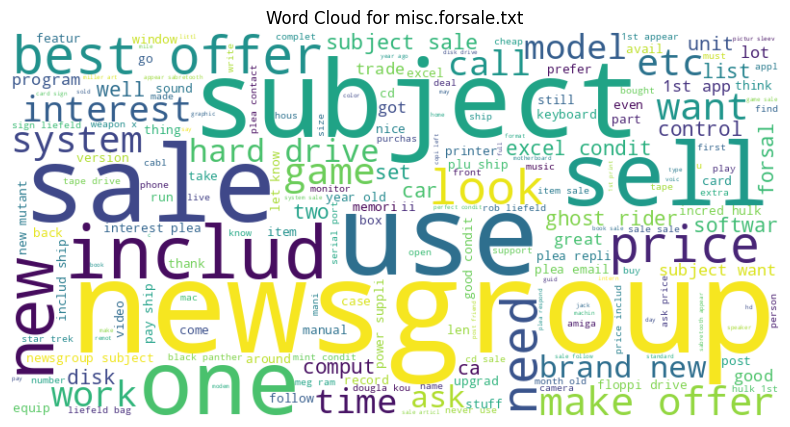

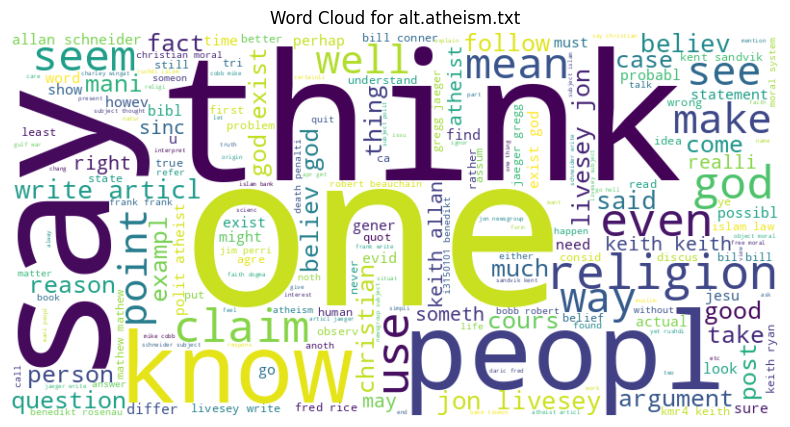

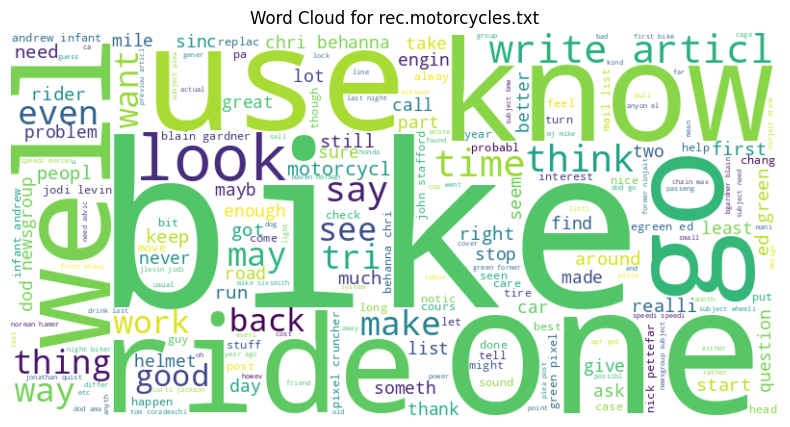

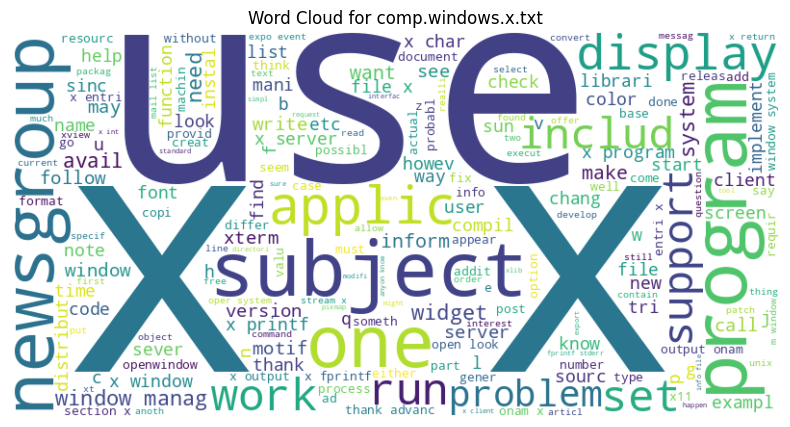

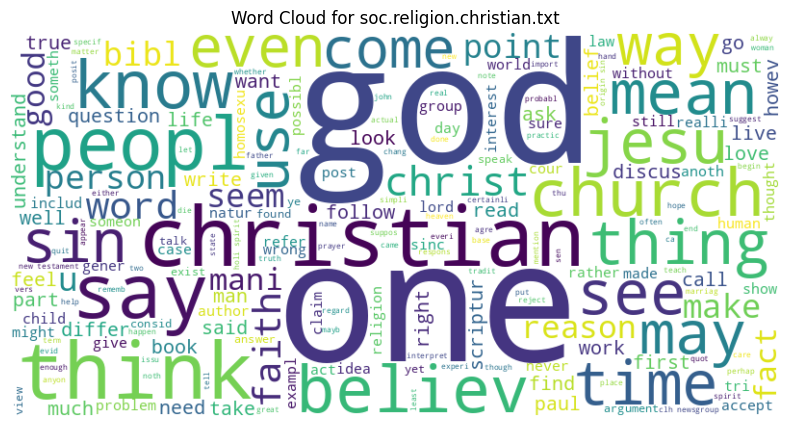

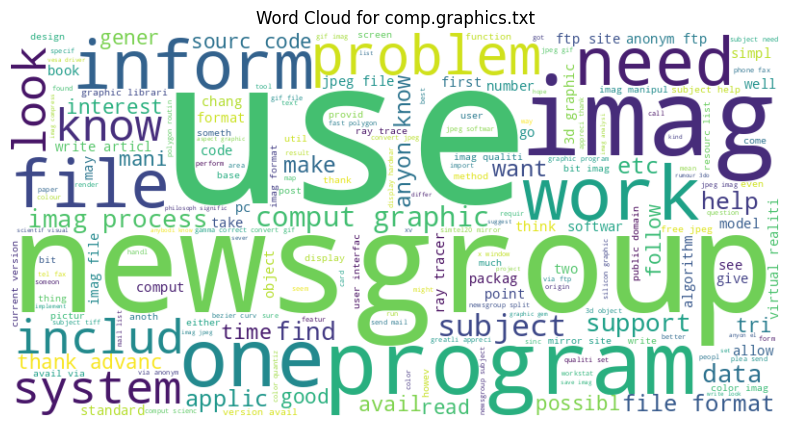

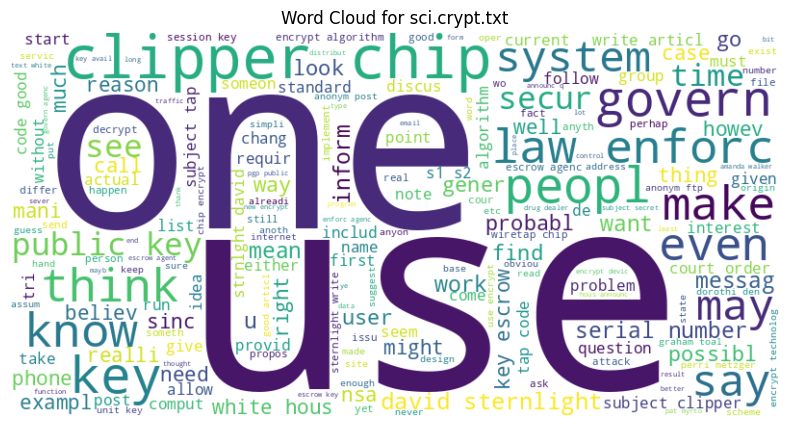

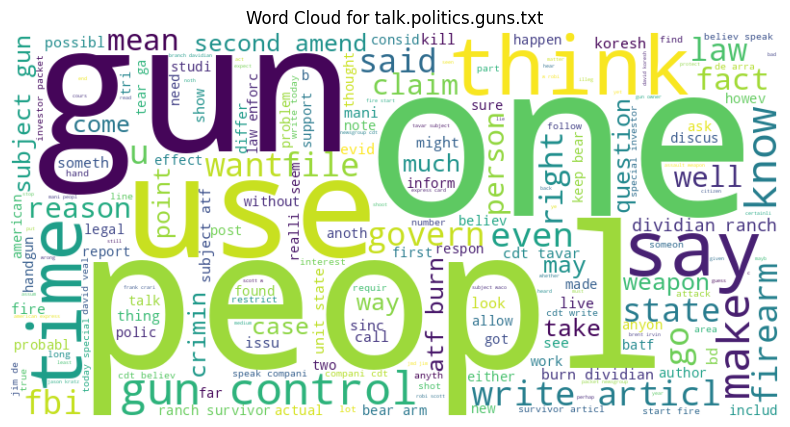

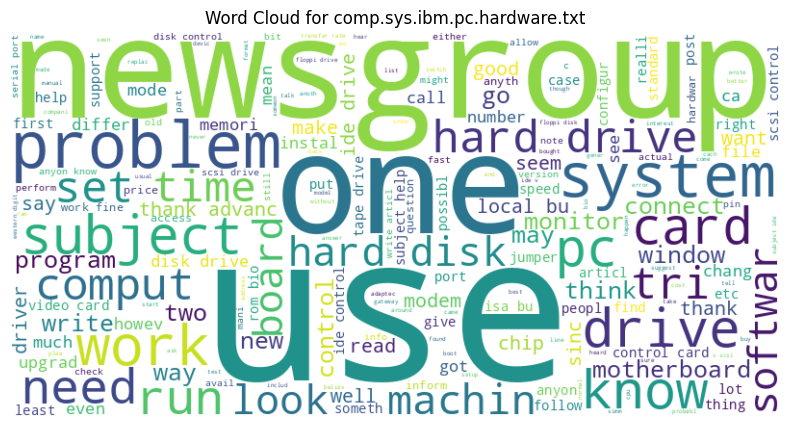

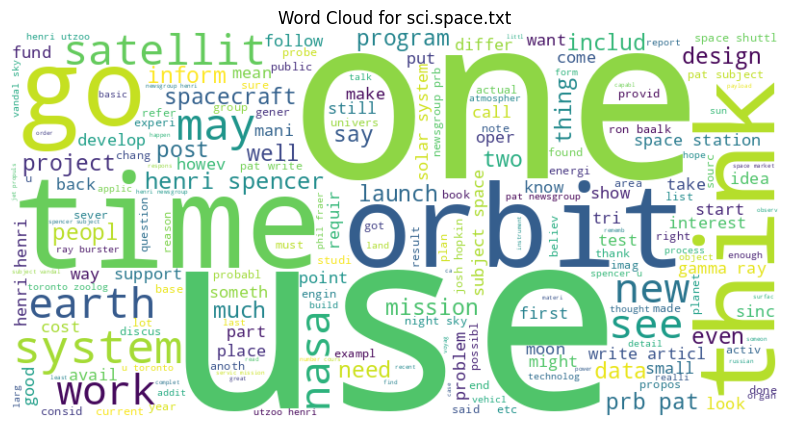

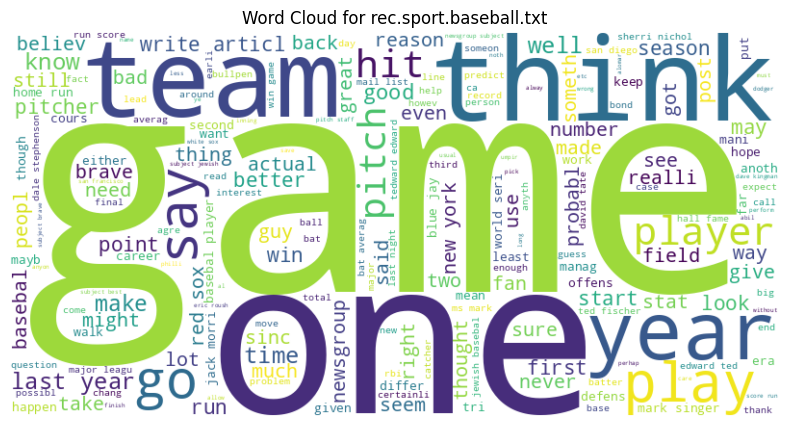

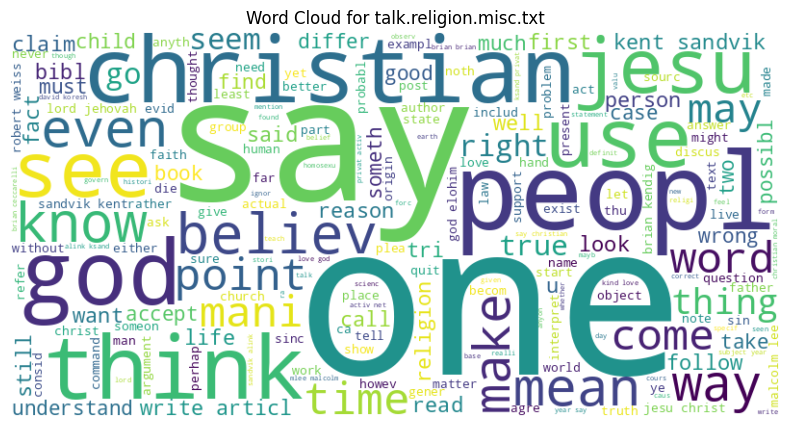

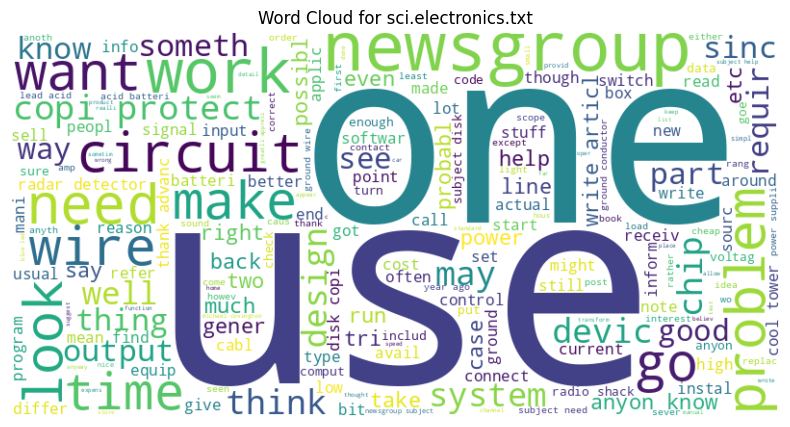

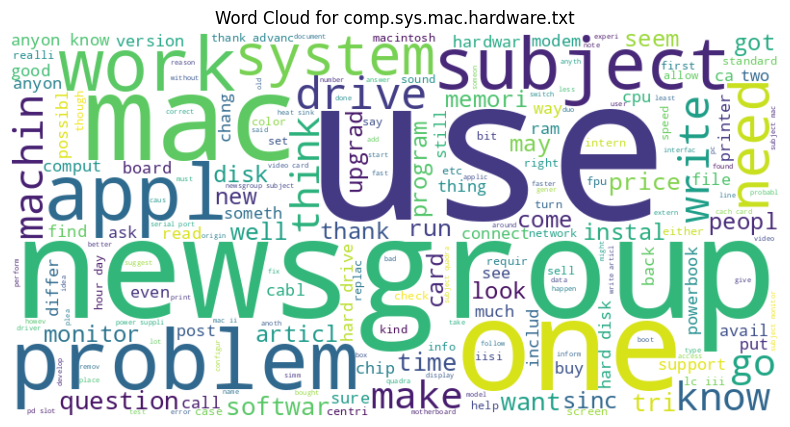

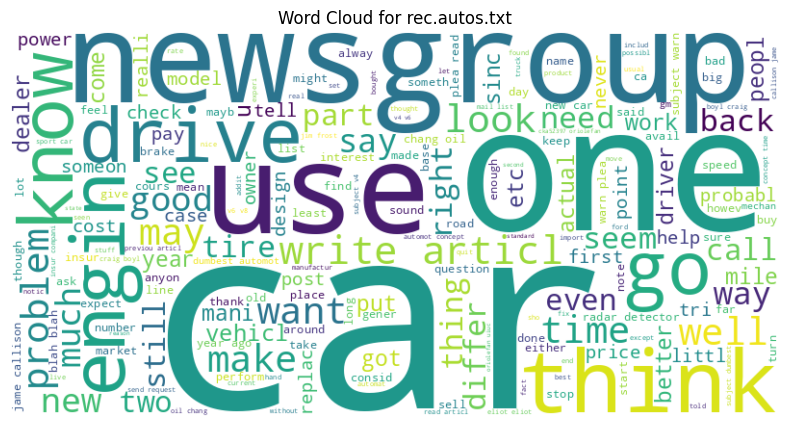

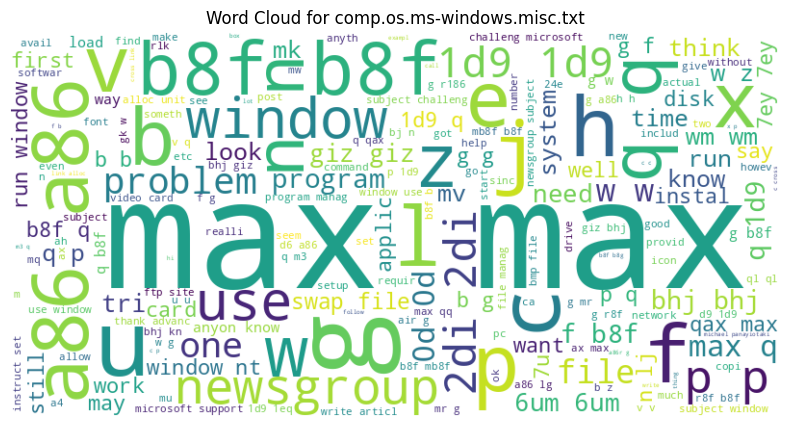

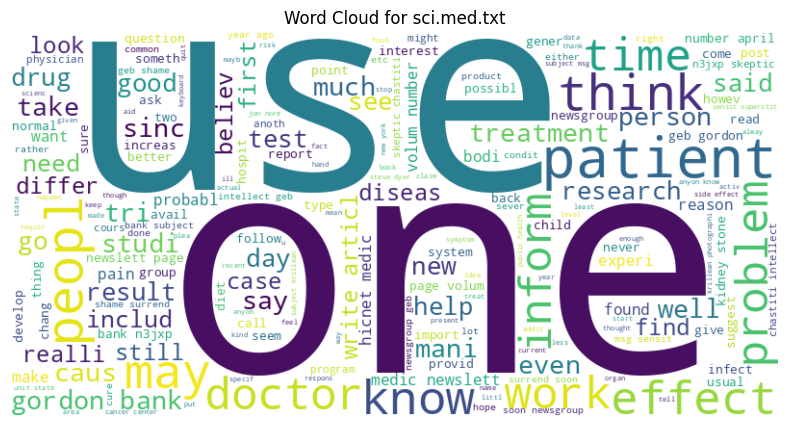

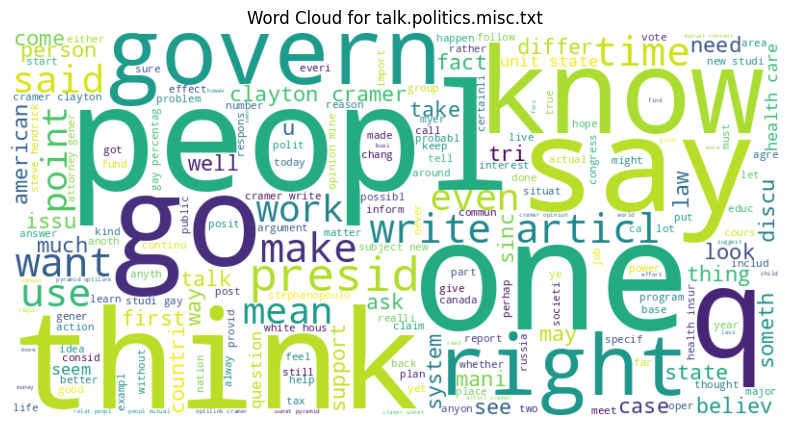

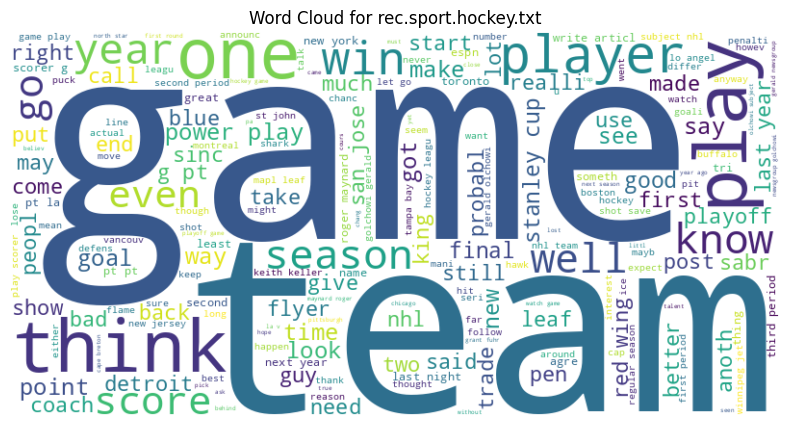

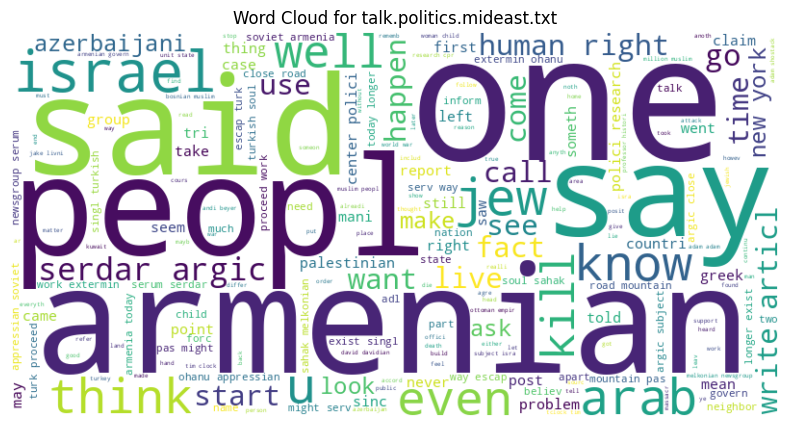

In [28]:
def generate_word_clouds(preprocessed_texts, filenames):
    for text, filename in zip(preprocessed_texts, filenames):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {filename}')
        plt.show()

# Generate word clouds for the preprocessed texts
generate_word_clouds(preprocessed_texts, filenames)

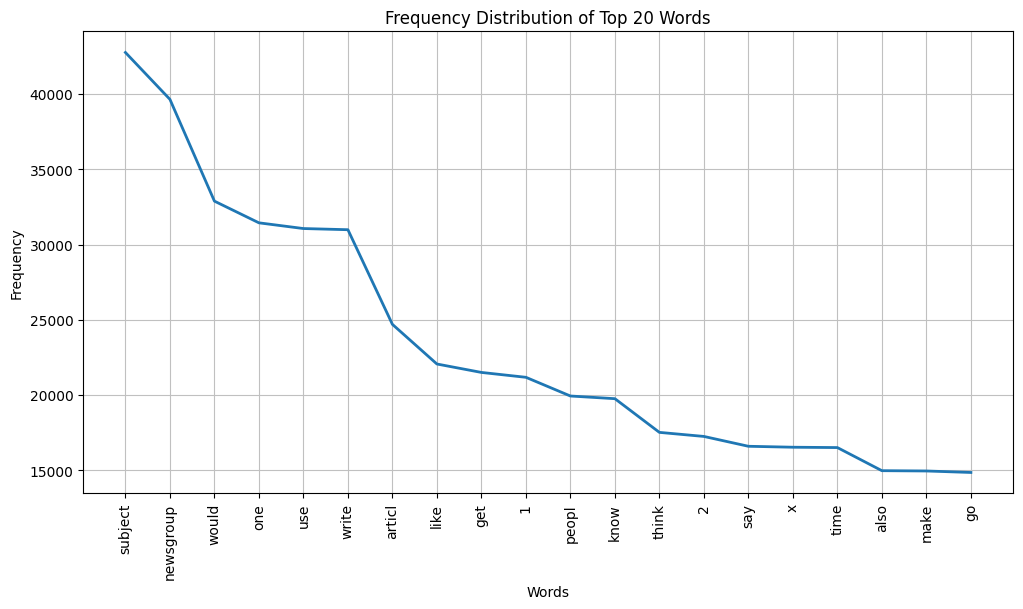

In [29]:
# Combine all preprocessed texts into a single string
all_text = ' '.join(preprocessed_texts)

# Tokenize the combined text
tokens = all_text.split()

# Create a frequency distribution
freq_dist = FreqDist(tokens)

# Plot the frequency distribution
plt.figure(figsize=(12, 6))
freq_dist.plot(20, cumulative=False)
plt.title('Frequency Distribution of Top 20 Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

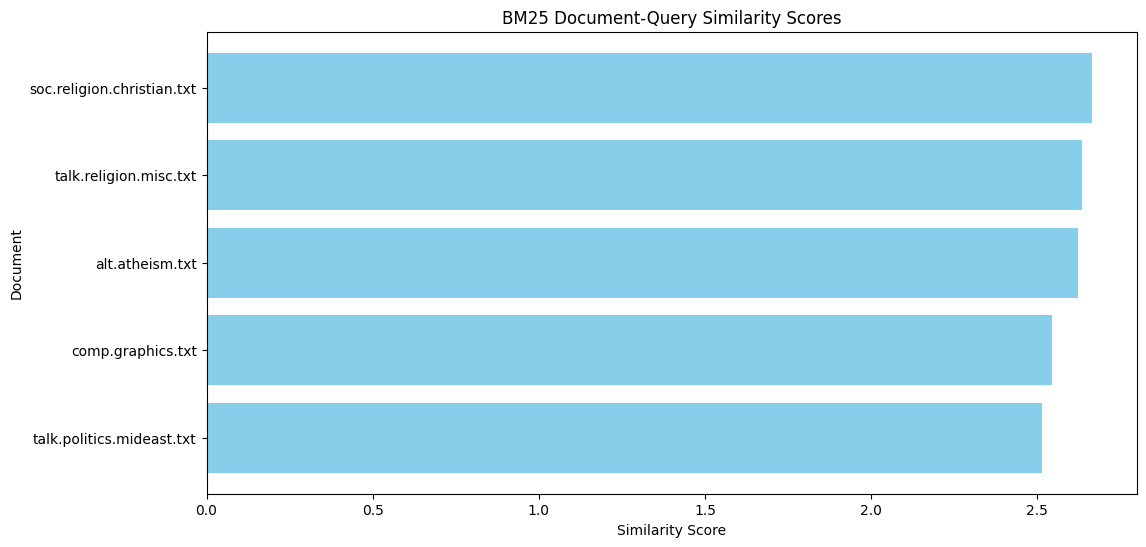

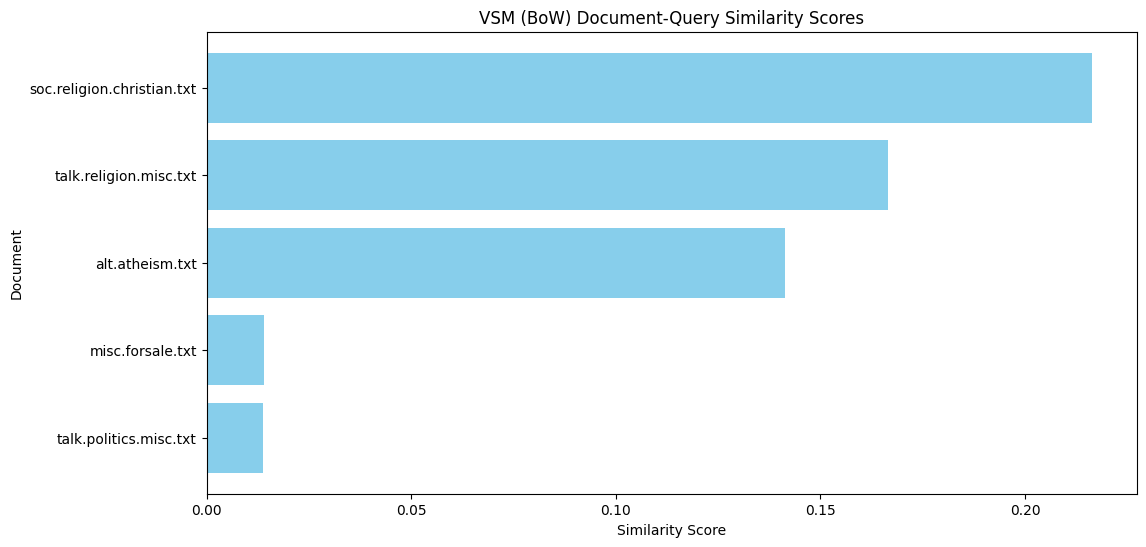

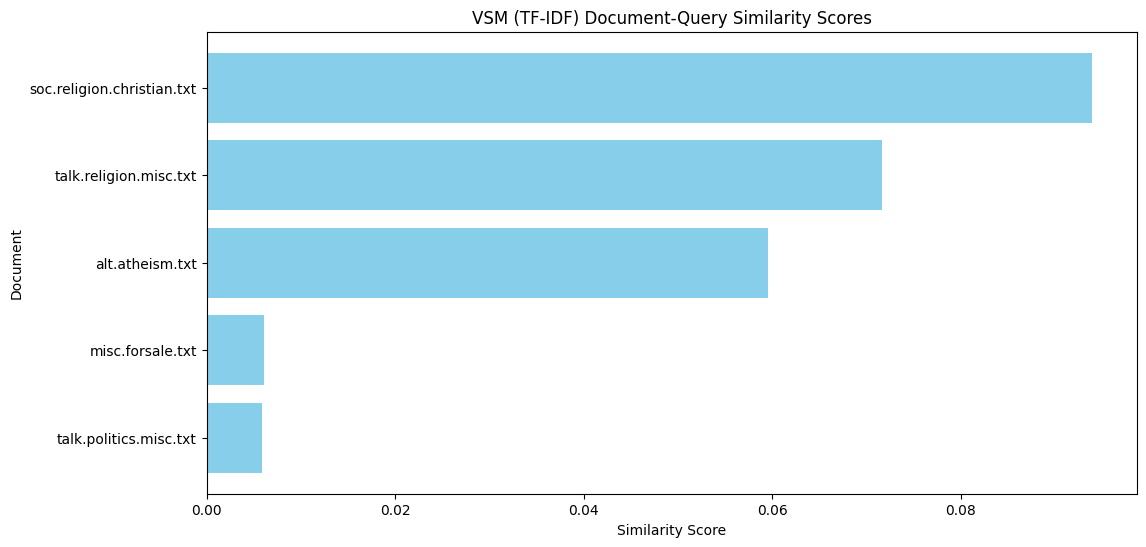

In [30]:
def plot_similarity_scores(similarity_scores, title):
    """
    Plot similarity scores as a bar chart.

    Parameters:
    similarity_scores (dict): Dictionary of document filenames and their similarity scores.
    title (str): Title of the plot.
    """
    # Extract filenames and scores
    filenames = list(similarity_scores.keys())
    scores = list(similarity_scores.values())

    # Create a bar chart
    plt.figure(figsize=(12, 6))
    plt.barh(filenames, scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Document')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
    plt.show()
# Plot similarity scores for BM25
plot_similarity_scores(bm25_ranked_documents, 'BM25 Document-Query Similarity Scores')

# Plot similarity scores for VSM with BoW
plot_similarity_scores(vsm_bow_ranked_documents, 'VSM (BoW) Document-Query Similarity Scores')

# Plot similarity scores for VSM with TF-IDF
plot_similarity_scores(vsm_tfidf_ranked_documents, 'VSM (TF-IDF) Document-Query Similarity Scores')

In [31]:
def perform_lda(preprocessed_texts, n_topics=5, n_top_words=10):
    """
    Perform Latent Dirichlet Allocation (LDA) on preprocessed texts.
    Parameters:
    preprocessed_texts (list of str): List of preprocessed texts.
    n_topics (int): Number of topics to extract.
    n_top_words (int): Number of top words to display for each topic.

    Returns:
    None
    """
    # Vectorize the preprocessed texts using TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_texts)

    # Perform LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)

    # Display the top words for each topic
    feature_names = tfidf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Perform LDA on the preprocessed texts
perform_lda(preprocessed_texts, n_topics=5, n_top_words=10)

Topic #1:
vlb irq dma adaptec d9 eisa ripem rsa decrypt ati

Topic #2:
vlb irq dma adaptec d9 eisa ripem rsa decrypt ati

Topic #3:
vlb irq dma adaptec d9 eisa ripem rsa decrypt ati

Topic #4:
subject newsgroup would use one write articl get like know

Topic #5:
vlb irq dma adaptec d9 eisa ripem rsa decrypt ati



# Results and Analysis 

In [34]:
def present_retrieved_documents(queries, preprocessed_texts, filenames, vectorizer_bow, vectorizer_tfidf):
    for query in queries:
        print(f"Query: {query}\n")
        
        # Apply BM25
        bm25_retrieved_docs, bm25_ranked_documents = apply_bm25(query=query, preprocessed_texts=preprocessed_texts, filenames=filenames)
        print("BM25 Retrieved Documents:")
        for doc in bm25_retrieved_docs:
            print(f"- {doc}")
        
        # Apply VSM with BoW
        vsm_bow_retrieved_documents, vsm_bow_ranked_documents = apply_vsm(query=query, preprocessed_texts=preprocessed_texts, vectorizer=vectorizer_bow)
        print("VSM (BoW) Retrieved Documents:")
        for doc in vsm_bow_retrieved_documents:
            print(f"- {doc}")
        
        # Apply VSM with TF-IDF
        vsm_tfidf_retrieved_documents, vsm_tfidf_ranked_documents = apply_vsm(query=query, preprocessed_texts=preprocessed_texts, vectorizer=vectorizer_tfidf)
        print("VSM (TF-IDF) Retrieved Documents:")
        for doc in vsm_tfidf_retrieved_documents:
            print(f"- {doc}")
        
        print("==================================")
        print("\n")

# Sample queries
sample_queries = ["god will punish you", "evolution of species", "quantum mechanics"]

# Present retrieved documents for sample queries
present_retrieved_documents(sample_queries, preprocessed_texts, filenames, vectorizer_bow, vectorizer_tfidf)

Query: god will punish you

BM25 Retrieved Documents:
- alt.atheism.txt
- soc.religion.christian.txt
- talk.religion.misc.txt
- talk.politics.mideast.txt
- misc.forsale.txt
VSM (BoW) Retrieved Documents:
- soc.religion.christian.txt
- talk.religion.misc.txt
- alt.atheism.txt
- misc.forsale.txt
- talk.politics.mideast.txt
VSM (TF-IDF) Retrieved Documents:
- soc.religion.christian.txt
- talk.religion.misc.txt
- alt.atheism.txt
- misc.forsale.txt
- talk.politics.misc.txt


Query: evolution of species

BM25 Retrieved Documents:
- alt.atheism.txt
- talk.religion.misc.txt
- sci.med.txt
- sci.space.txt
- soc.religion.christian.txt
VSM (BoW) Retrieved Documents:
- rec.autos.txt
- talk.politics.guns.txt
- alt.atheism.txt
- rec.sport.baseball.txt
- talk.politics.mideast.txt
VSM (TF-IDF) Retrieved Documents:
- rec.autos.txt
- alt.atheism.txt
- talk.politics.guns.txt
- rec.sport.baseball.txt
- talk.politics.mideast.txt


Query: quantum mechanics

BM25 Retrieved Documents:
- comp.sys.mac.hardware.t

In [35]:
import pandas as pd
# Summary of performance metrics
performance_metrics = {
    'Model': ['BM25', 'VSM (BoW)', 'VSM (TF-IDF)'],
    'Precision': [bm25_precision, vsm_bow_precision, vsm_tfidf_precision],
    'Recall': [bm25_recall, vsm_bow_recall, vsm_tfidf_recall],
    'MAP': [bm25_map, vsm_bow_map, vsm_tfidf_map]  
}

# Convert the performance metrics to a DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics)

# Display the performance metrics
print(performance_df)

          Model  Precision  Recall       MAP
0          BM25        0.6     1.0  0.444444
1     VSM (BoW)        0.6     1.0  0.490741
2  VSM (TF-IDF)        0.6     1.0  0.490741


# Conclusion

## Key Findings
1. The BM25 model, VSM with BoW, and VSM with TF-IDF all achieved the same precision and recall values.
2. The Mean Average Precision (MAP) for all models was also very close, with VSM models slightly outperforming BM25.
3. The models were able to retrieve relevant documents effectively, with BM25 and VSM models showing similar performance.

## Performance Comparison
The performance metrics for the three models are summarized in the table below:

In [38]:
# Performance Comparison
performance_comparison = performance_df.to_string(index=False)
print("\nPerformance Comparison:\n")
print(performance_comparison)


Performance Comparison:

       Model  Precision  Recall      MAP
        BM25        0.6     1.0 0.444444
   VSM (BoW)        0.6     1.0 0.490741
VSM (TF-IDF)        0.6     1.0 0.490741


## Insights
1. The precision and recall values indicate that the models are effective in retrieving relevant documents.
2. The similarity in performance metrics suggests that all three models are equally capable of handling the given dataset.
3. The choice of model may depend on other factors such as computational efficiency and ease of implementation.
4. Visualization tools such as word clouds and frequency distributions provide valuable insights into the text data.
5. LDA topic modeling can help in understanding the underlying themes in the documents.

# Future Work and Areas for Improvement

1. **Dataset Expansion**: Incorporate a larger and more diverse dataset to evaluate the models' performance on a wider range of topics and document types.

2. **Advanced Preprocessing Techniques**: Explore additional preprocessing techniques such as named entity recognition (NER), part-of-speech (POS) tagging, and dependency parsing to enhance text representation.

3. **Hyperparameter Tuning**: Perform hyperparameter tuning for the retrieval models (e.g., BM25 parameters, vectorizer settings) to optimize their performance.

4. **Incorporate Deep Learning Models**: Investigate the use of deep learning-based retrieval models such as BERT, GPT, or other transformer-based models to improve retrieval accuracy.

5. **User Feedback Integration**: Develop a mechanism to incorporate user feedback into the retrieval system to continuously improve its relevance and accuracy.

6. **Multilingual Support**: Extend the system to support multiple languages, enabling retrieval from multilingual datasets.

7. **Real-time Retrieval**: Implement real-time retrieval capabilities to handle dynamic and continuously updating datasets.

8. **Scalability and Performance**: Optimize the system for scalability and performance to handle large-scale datasets and high query volumes efficiently.

9. **Evaluation Metrics**: Explore additional evaluation metrics such as F1-score, NDCG (Normalized Discounted Cumulative Gain), and user satisfaction to provide a more comprehensive assessment of model performance.

10. **Visualization Enhancements**: Enhance visualization tools to provide more interactive and insightful visualizations, such as interactive word clouds, topic modeling visualizations, and similarity heatmaps.

11. **Integration with External Systems**: Integrate the retrieval system with external systems or APIs to enable seamless access to external data sources and services.

12. **User Interface Improvements**: Develop a user-friendly interface to allow users to interact with the retrieval system more effectively, including advanced search options and result filtering.

By addressing these areas, the retrieval system can be further improved to provide more accurate, efficient, and user-friendly information retrieval capabilities.

# References

- **Datasets:**
    - 20 Newsgroups Dataset: [Kaggle - 20 Newsgroups](https://www.kaggle.com/crawford/20-newsgroups)

- **Tools and Libraries:**
    - **Pandas:** Data manipulation and analysis library. [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
    - **NLTK:** Natural Language Toolkit for text processing. [NLTK Documentation](https://www.nltk.org/)
    - **Scikit-learn:** Machine learning library for Python. [Scikit-learn Documentation](https://scikit-learn.org/stable/)
    - **Rank-BM25:** Implementation of the BM25 ranking function. [Rank-BM25 GitHub](https://github.com/dorianbrown/rank_bm25)
    - **WordCloud:** A tool for generating word clouds. [WordCloud GitHub](https://github.com/amueller/word_cloud)
    - **PyLDAvis:** Interactive topic model visualization. [PyLDAvis GitHub](https://github.com/bmabey/pyLDAvis)
    - **Matplotlib:** Plotting library for Python. [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)